<a href="https://colab.research.google.com/github/thinkinchicken/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1: Selecting a dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



First Choice: Data set

1) Source of Data: Kaggle

2) 1700 individual chocolate bar ratings, regional origin, percentage of coca, and variety of chocolate bean, and region of where they were grown. 

3) Target is the rating of the chocolate bar

4) This is a regression problem. 

5) 8 features

6) 1795 rows

7) Challenges is some columns have null values for certain features. May need some extra cleaning 


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/07 Week 7: Classification Models/flavors_of_cacao.csv', header = 0)
df.shape

(1795, 9)

In [5]:
df.head()
df['Bean\nType'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Nacional (Arriba)             3
Matina                        3
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Trinitario, Forastero         2
Amazon mix                    2
Criollo (Amarru)              2
Forastero (Catongo)           2
Criollo, Forastero            2
Nacional                      2
Criollo (Ocumare 61)          2
Blend-Forastero,Criollo       1
Amazon                        1
Criollo (Ocumare)             1
Forastero (Arriba) ASSS       1
Trinitario, TCGA              1
Trinitario (Scavina)          1
Criollo,

Second Choice: Data set 2

1) Source of Data: Kaggle

2) Data includes country, locality, market, goods purchased, price, currency used, quantity, and month/year of purchase of food prices worldwide

3) Target is the price of the food

4) This is a regression problem

5) 10 features

6) 743914 rows of data

7) Challenges I foresee is that the dataset may need extra cleaning and there are also a lot of features that are necessarily numerical. 
It is a very large dataset that may also take a lot of time to train and test on. 

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/07 Week 7: Classification Models/wfp_market_food_prices.csv',encoding='latin-1')
df2.head()


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [7]:
df2.shape

(743914, 18)

Flavors of cacao dataset has been approved!


##Part 2: Cleaning the dataset

In [8]:
df.head()


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [9]:
#Renaming all the columns to be more readable and getting rid of some of the weird characters in each of them
df = df.rename(columns = {'Specific Bean Origin\nor Bar Name':'Specific_Bean_Origin_Bar_Name', 'Review\nDate':'Review_Date', 'Cocoa\nPercent':'Cocoa_percent','Company\nLocation':'Company_location', 'Bean\nType':'Bean_type', 'Broad Bean\nOrigin': 'Broad_Bean_Origin'})

In [10]:
#Renaming the first column because the first time didn't work
df = df.rename(columns={ df.columns[0]: 'Company(Maker)' })

In [11]:
#Checking if the renaming worked
df.head()

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Review_Date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [12]:
#checking for null values, We see that there are 2 in both bean type and broad bean origin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1795 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1795 non-null   object 
 2   REF                            1795 non-null   int64  
 3   Review_Date                    1795 non-null   int64  
 4   Cocoa_percent                  1795 non-null   object 
 5   Company_location               1795 non-null   object 
 6   Rating                         1795 non-null   float64
 7   Bean_type                      1794 non-null   object 
 8   Broad_Bean_Origin              1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [13]:
#Checking the specific on these null values
df[df.isnull().any(axis=1)]

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Review_Date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [14]:
#Deciding to drop the null values as they are not a simple fix of imputing or backfilling and it is only 2 data points
df = df.dropna()

In [15]:
#checking to see if removing null values worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1793 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1793 non-null   object 
 2   REF                            1793 non-null   int64  
 3   Review_Date                    1793 non-null   int64  
 4   Cocoa_percent                  1793 non-null   object 
 5   Company_location               1793 non-null   object 
 6   Rating                         1793 non-null   float64
 7   Bean_type                      1793 non-null   object 
 8   Broad_Bean_Origin              1793 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


In [16]:
#Checking for duplicated values. Looks like there isn't any
df.duplicated().any()

False

In [17]:
df['REF'].nunique()
#Looking at the data dictionary, this value is an index for the date the review was actually done

440

In [18]:
#The date the Review was published does not seem relevant to the rating of the actual chocolate bar so going to remove that column
df = df.drop(columns = 'Review_Date')


In [19]:
df.head()

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,70%,France,3.50,,Peru


In [20]:
#Need to convert cocoa_percent to a float but also need to remove the percentage sign
df['Cocoa_percent'] = df['Cocoa_percent'].str.strip('%').astype(float)/100

In [21]:
#Checking to see if conversion of data type worked
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1793 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1793 non-null   object 
 2   REF                            1793 non-null   int64  
 3   Cocoa_percent                  1793 non-null   float64
 4   Company_location               1793 non-null   object 
 5   Rating                         1793 non-null   float64
 6   Bean_type                      1793 non-null   object 
 7   Broad_Bean_Origin              1793 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 126.1+ KB


In [22]:
df.head()

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,0.70,France,3.50,,Peru


In [23]:
#Checking the stats and if there are any outliers or weird numbers
df.describe()

,REF,Cocoa_percent,Rating
count,1793.000000,1793.000000,1793.000000
mean,1036.126046,0.716991,3.185862
std,553.128742,0.063265,0.477668
min,5.000000,0.420000,1.000000
25%,576.000000,0.700000,3.000000
50%,1073.000000,0.700000,3.250000
75%,1502.000000,0.750000,3.500000
max,1952.000000,1.000000,5.000000


In [24]:
#Starting to check ig there are any inconsistencies or misspellings
df['Company(Maker)'].value_counts()

Soma                    46
Bonnat                  27
Fresco                  26
Pralus                  25
A. Morin                23
                        ..
Friis Holm               1
Forever Cacao            1
Edelmond                 1
Rancho San Jacinto       1
Chocolate Conspiracy     1
Name: Company(Maker), Length: 416, dtype: int64

In [25]:
df['Specific_Bean_Origin_Bar_Name'].value_counts()

Madagascar                      56
Peru                            45
Ecuador                         42
Dominican Republic              37
Venezuela                       21
                                ..
Saidor Estate, Madang P.         1
Ecuador, Bob Bar                 1
Sambirano Valley, batch 2477     1
Kongo, Highlands                 1
Venzuela                         1
Name: Specific_Bean_Origin_Bar_Name, Length: 1038, dtype: int64

In [26]:
df['Company_location'].value_counts()

U.S.A.               763
France               156
Canada               124
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
New Zealand           17
Brazil                17
Peru                  17
Madagascar            17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Argentina              9
Costa Rica             9
Israel                 9
Poland                 8
Honduras               6
Lithuania              6
Nicaragua              5
Sweden                 5
Domincan Republic      5
South Korea            5
Puerto Rico            4
Mexico                 4
Netherlands            4
Fiji                   4
Sao Tome               4
Ireland                4


In [27]:
df['Bean_type'].value_counts()
#We see that there are a lot of blank values for bean type. Might be worth filling in this with "Unknown"

                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Nacional (Arriba)             3
Matina                        3
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Trinitario, Forastero         2
Amazon mix                    2
Criollo (Amarru)              2
Forastero (Catongo)           2
Criollo, Forastero            2
Nacional                      2
Criollo (Ocumare 61)          2
Blend-Forastero,Criollo       1
Amazon                        1
Criollo (Ocumare)             1
Forastero (Arriba) ASSS       1
Trinitario, TCGA              1
Trinitario (Scavina)          1
Criollo,

In [28]:
#Getting the column value of blank to be replaced because just using '' isn't working
df['Bean_type'].max()


'\xa0'

In [29]:
#Replacing with Unknown
df['Bean_type']= df['Bean_type'].replace('\xa0','Unknown')

In [30]:
#Checking to see if it worked. It did! 
df['Bean_type'].value_counts()

Unknown                     887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Matina                        3
Nacional (Arriba)             3
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Trinitario, Forastero         2
Amazon mix                    2
Criollo (Ocumare 61)          2
Forastero (Catongo)           2
Criollo (Amarru)              2
Criollo, Forastero            2
Nacional                      2
Amazon                        1
Criollo (Ocumare)             1
Forastero (Arriba) ASSS       1
Trinitario (Scavina)          1
Criollo, +                    1
Blend-Forastero,Criollo       1
Trinitar

In [31]:
#Checking dataset again to see what we can plot
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1793 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1793 non-null   object 
 2   REF                            1793 non-null   int64  
 3   Cocoa_percent                  1793 non-null   float64
 4   Company_location               1793 non-null   object 
 5   Rating                         1793 non-null   float64
 6   Bean_type                      1793 non-null   object 
 7   Broad_Bean_Origin              1793 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 126.1+ KB


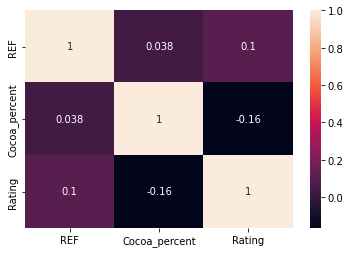

In [32]:
#Correlation heatmap. Doesn't seem to be any correlation between the numerical data points
sns.heatmap(df.corr(), annot=True)


In [33]:
#Sorting the top rated bars to plot
df = df.sort_values(by = ['Rating'],ascending = False)

In [34]:
#Getting the top 10 rated bars
top_10 = df[:10]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

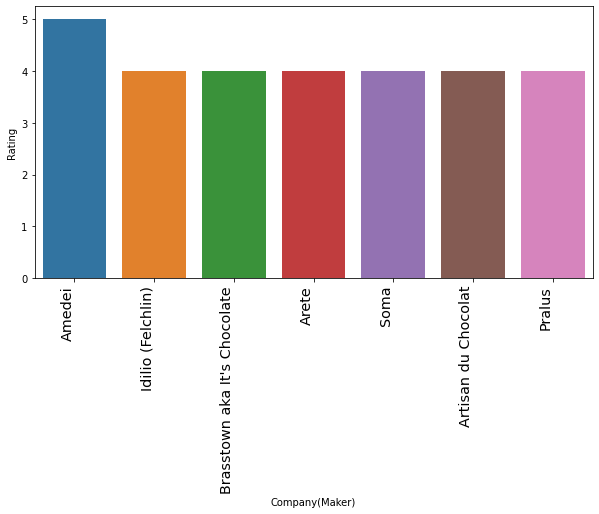

In [35]:
#Plotting the top 10 bars by Company

plt.figure(figsize=(10,5))
plot = sns.barplot(top_10['Company(Maker)'], top_10['Rating'])
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


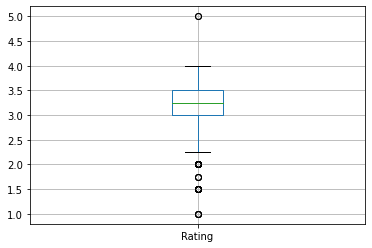

In [36]:
#Checking the outliers within Rating. Looks like there are a couple. 5 data points
df.boxplot(['Rating'])

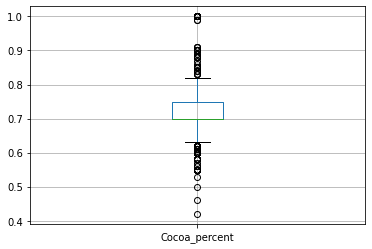

In [37]:
df.boxplot(['Cocoa_percent'])
# A lot more outliers here for coca percentage in the bars

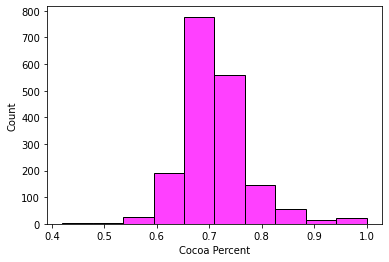

In [45]:
#Plotting a histogram to see the distribution of the Cocoa percentage also. Looks relatively normal
sns.histplot(df['Cocoa_percent'], bins = 10, color = 'magenta') 
plt.ylabel('Count')
plt.xlabel('Cocoa Percent');